# HW 6

In [166]:
library(faraway)
library(ggplot2)
library(ggpubr)

## Part A (Maximum 4 pages 100 points). 

##### Ankylosing spondylitis is a chronic form of arthritis. A study was conducted to determine whether daily stretching of the hip tissues would improve mobility. The data are found in hips. The flexion angle of the hip before the study ($fbef$) is a predictor and the flexion angle after the study ($faft$) is the response. (The variables $rbef$ and $raft$ won’t be used.)

In [167]:
# initialize data
data(hips)
head(hips)
summary(hips)
dim(hips)

,fbef,faft,rbef,raft,grp,side,person
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,125,126,25,36,treat,right,1
2,120,127,35,37,treat,left,1
3,135,135,28,40,treat,right,2
4,135,135,24,34,treat,left,2
5,100,113,26,30,treat,right,3
6,110,115,24,26,treat,left,3


      fbef            faft            rbef            raft            grp    
 Min.   : 77.0   Min.   : 88.0   Min.   : 2.00   Min.   : 2.00   control:24  
 1st Qu.:108.0   1st Qu.:115.0   1st Qu.:20.25   1st Qu.:25.00   treat  :54  
 Median :115.0   Median :121.0   Median :25.00   Median :30.00               
 Mean   :114.5   Mean   :120.8   Mean   :24.85   Mean   :29.71               
 3rd Qu.:123.0   3rd Qu.:127.0   3rd Qu.:31.50   3rd Qu.:36.00               
 Max.   :135.0   Max.   :139.0   Max.   :48.00   Max.   :50.00               
                                                                             
    side        person  
 right:39   1      : 2  
 left :39   2      : 2  
            3      : 2  
            4      : 2  
            5      : 2  
            6      : 2  
            (Other):66  

[1] 78  7

##### 1. (10 points) Plot the data using different plotting symbols for the treatment and the control status.

In [168]:
by(hips, hips$grp, summary)

hips$grp: control
      fbef            faft            rbef            raft            grp    
 Min.   : 81.0   Min.   : 96.0   Min.   : 4.00   Min.   : 2.00   control:24  
 1st Qu.:105.0   1st Qu.:110.0   1st Qu.:21.75   1st Qu.:24.00   treat  : 0  
 Median :112.0   Median :115.0   Median :26.00   Median :27.00               
 Mean   :110.0   Mean   :113.8   Mean   :25.00   Mean   :25.96               
 3rd Qu.:114.2   3rd Qu.:120.0   3rd Qu.:29.00   3rd Qu.:30.25               
 Max.   :126.0   Max.   :126.0   Max.   :36.00   Max.   :41.00               
                                                                             
    side        person  
 right:12   28     : 2  
 left :12   29     : 2  
            30     : 2  
            31     : 2  
            32     : 2  
            33     : 2  
            (Other):12  
------------------------------------------------------------ 
hips$grp: treat
      fbef            faft          rbef            raft            grp    
 Min

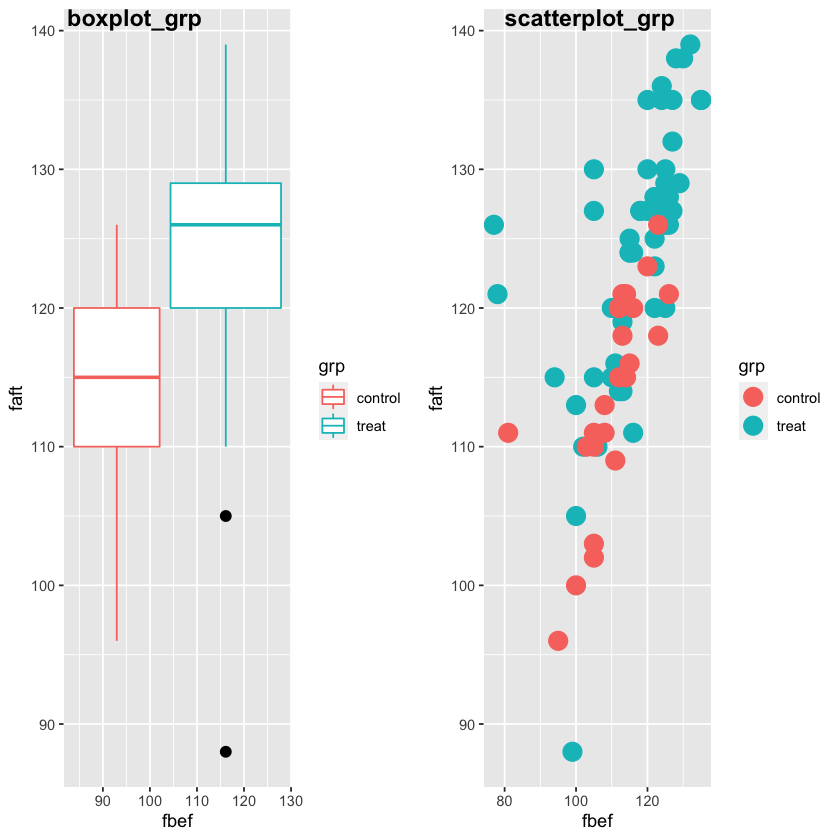

In [169]:
bxp = ggplot(hips, aes(fbef, faft, color = grp))+geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=3, notch=FALSE)
scp = ggplot(hips, aes(fbef, faft, color = grp)) + geom_point(size = 5)
ggarrange(bxp,scp , labels = c("boxplot_grp", "scatterplot_grp"),ncol = 2, nrow = 1)

From the boxplot, we can see that the average $faft$ values in control group are lower than the ones in treat group; besides, there are two obvious outliers in treating group.\
From the scatterplot, we can see that the $fbef$ and $faft$ have a rough linear relationship there. We can also see that the control group tends to have lower $faft$ and $fbef$ values, while the treating group tends to have higher $faft$ and $fbef$ values.

##### 2. (20 points) Fit a model to determine whether there is a treatment effect. (Hints: Please use model selection to select the model. For example, you may need to determine whether the interaction term should be included)

In [170]:
lmod_inter = lm(faft~fbef+grp+fbef*grp,hips)
summary(lmod_inter)


Call:
lm(formula = faft ~ fbef + grp + fbef * grp, data = hips)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.7919  -3.2746   0.1585   3.0270  20.5036 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    50.8476    16.7102   3.043 0.003242 ** 
fbef            0.5721     0.1514   3.778 0.000317 ***
grptreat       18.6146    19.0800   0.976 0.332436    
fbef:grptreat  -0.1041     0.1706  -0.610 0.543696    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.006 on 74 degrees of freedom
Multiple R-squared:  0.535,	Adjusted R-squared:  0.5161 
F-statistic: 28.38 on 3 and 74 DF,  p-value: 2.547e-12


In [171]:
X = model.matrix(lmod_inter)[, -1]
round(cor(X),2)

,fbef,grptreat,fbef:grptreat
fbef,1.00,0.26,0.41
grptreat,0.26,1.00,0.98
fbef:grptreat,0.41,0.98,1.00


We can see that the $p$-value for the interaction term is 0.543696, which is insignificant. Therefore, we should not include the interaction term.

In [172]:
lmod = lm(faft~fbef+grp,hips)
summary(lmod)


Call:
lm(formula = faft ~ fbef + grp, data = hips)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.4050  -3.1586   0.0214   3.1850  21.3768 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 59.86141    7.77213   7.702 4.39e-11 ***
fbef         0.49008    0.06949   7.053 7.39e-10 ***
grptreat     7.02553    1.77085   3.967 0.000165 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.976 on 75 degrees of freedom
Multiple R-squared:  0.5327,	Adjusted R-squared:  0.5202 
F-statistic: 42.74 on 2 and 75 DF,  p-value: 4.087e-13


We can see all predictors are significant here, which means this model is a better fit for the dataset.

##### 3. (20 points) Compute the difference between the flexion before and after and test whether this difference varies between treatment and control.Contrast this approach to your previous model. (use $var.equal = T$ in the test)

In [173]:
attach(hips)

The following objects are masked from hips_new (pos = 3):

    faft, fbef, grp, person


The following objects are masked from hips (pos = 4):

    faft, fbef, grp, person, raft, rbef, side


The following objects are masked from hips_new (pos = 5):

    faft, fbef, grp, person


The following objects are masked from hips (pos = 6):

    faft, fbef, grp, person, raft, rbef, side


The following objects are masked from hips_new (pos = 7):

    faft, fbef, grp, person


The following objects are masked from hips (pos = 8):

    faft, fbef, grp, person, raft, rbef, side


The following objects are masked from hips_new (pos = 9):

    faft, fbef, grp, person


The following objects are masked from hips (pos = 10):

    faft, fbef, grp, person, raft, rbef, side


The following objects are masked from hips_new (pos = 11):

    faft, fbef, grp, person


The following objects are masked from hips (pos = 12):

    faft, fbef, grp, person, raft, rbef, side


The following objects are masked from

In [174]:
diff = faft-fbef
t.test(diff[grp=="treat"], diff[grp=="control"], var.equal = T)


	Two Sample t-test

data:  diff[grp == "treat"] and diff[grp == "control"]
t = 1.6557, df = 76, p-value = 0.1019
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7487195  8.1283492
sample estimates:
mean of x mean of y 
 7.481481  3.791667 


We can see that the $p$-value is 0.1019, the CI includes 0 as well. As a result, we do not have enough evidence to reject $H_0$ (no difference between differences of flexion before and after in treatment and control).

##### 4. (10 points) What is the estimated size of the treatment effect? Give a 95% confidence interval.

In [175]:
confint(lmod)

,2.5 %,97.5 %
(Intercept),44.3785299,75.3442960
fbef,0.3516589,0.6285049
grptreat,3.4978116,10.5532467


The estimated size of the treatment effect is 7.02553. The 95% confidence interval is (3.4978116, 10.5532467).

##### 5. (20 points) Notice that both legs of each subject have been included in the study as separate observations. Explain what difficulties this causes with the model assumptions.

One of the standard assumptions in the regression model is that the error terms $\epsilon_i$ and $\epsilon_j$ , associated with the $i^{th}$ and $j^{th}$  observations, are uncorrelated. Besides, we also usually assume there is no collinearity between predictors. If the observations of both legs are included, it is very likely to have correlated predictors and correlated errors. Collinearity will lead to the result that changing in one variable would cause change to another and so the model results fluctuate significantly. Besides, if the error terms are correlated then the standard error in the model coefficients gets underestimated. As a result, confidence and prediction intervals will be narrower than they should be.

##### 6. (20 points) Compute the average angles for each subject and repeat the modeling with this reduced data set (hips new). Point out differences in the conclusions if any. The code below will help you get the average.

In [176]:
hips_new<-aggregate(list(fbef=hips$fbef, faft=hips$faft),by=list(person=hips$person), mean)
hips_new$grp=hips$grp[match(hips_new$person,hips$person)]

In [177]:
head(hips_new)

,person,fbef,faft,grp
,<fct>,<dbl>,<dbl>,<fct>
1,1,122.5,126.5,treat
2,2,135.0,135.0,treat
3,3,105.0,114.0,treat
4,4,122.0,124.0,treat
5,5,124.0,130.5,treat
6,6,117.5,120.0,treat


##### a) plot boxplot and scatterplot

In [178]:
by(hips_new, hips_new$grp, summary)

hips_new$grp: control
     person       fbef            faft            grp    
 28     :1   Min.   : 94.5   Min.   :101.5   control:12  
 29     :1   1st Qu.:103.9   1st Qu.:109.9   treat  : 0  
 30     :1   Median :111.0   Median :113.2               
 31     :1   Mean   :110.0   Mean   :113.8               
 32     :1   3rd Qu.:114.5   3rd Qu.:120.5               
 33     :1   Max.   :124.5   Max.   :123.5               
 (Other):6                                               
------------------------------------------------------------ 
hips_new$grp: treat
     person        fbef            faft            grp    
 1      : 1   Min.   : 77.5   Min.   : 96.5   control: 0  
 2      : 1   1st Qu.:113.2   1st Qu.:120.0   treat  :27  
 3      : 1   Median :117.5   Median :125.5               
 4      : 1   Mean   :116.5   Mean   :124.0               
 5      : 1   3rd Qu.:124.0   3rd Qu.:130.5               
 6      : 1   Max.   :135.0   Max.   :137.0               
 (Other):21        

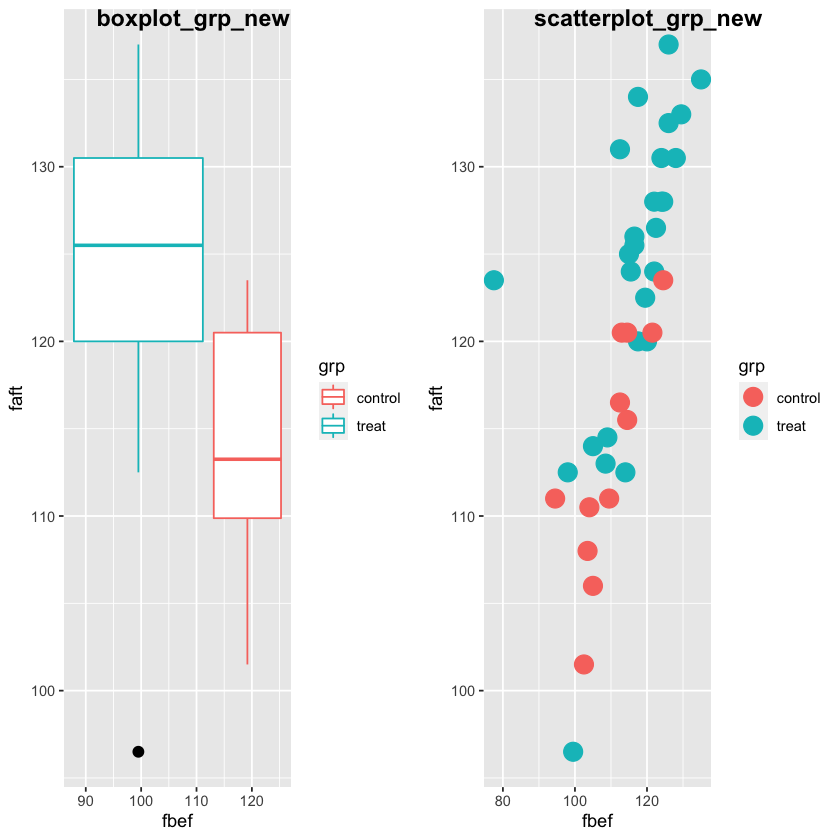

In [186]:
bxp = ggplot(hips_new, aes(fbef, faft, color = grp))+geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=3, notch=FALSE)
scp = ggplot(hips_new, aes(fbef, faft, color = grp)) + geom_point(size = 5)
ggarrange(bxp,scp , labels = c("boxplot_grp_new", "scatterplot_grp_new"),ncol = 2, nrow = 1)

From the boxplot, we can see that the average $faft$ values in control group are lower than the ones in treat group; besides, there are one obvious outliers in treating group. Compared to the original dataset, both group have smaller confidence intervals. \
From the scatterplot, we can see that the $fbef$ and $faft$ have a linear relationship there. We can also see that the control group tends to have lower $faft$ and $fbef$ values, while the treating group tends to have higher $faft$ and $fbef$ values.

##### b) fit a model to test whether there is a treatment effect

In [180]:
lmod_inter_new = lm(faft~fbef+grp+fbef*grp,hips_new)
summary(lmod_inter_new)


Call:
lm(formula = faft ~ fbef + grp + fbef * grp, data = hips_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.3035  -2.7760   0.4106   2.4418  18.2798 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)    42.6868    25.2138   1.693  0.09934 . 
fbef            0.6463     0.2287   2.826  0.00773 **
grptreat       25.2514    28.2284   0.895  0.37715   
fbef:grptreat  -0.1652     0.2531  -0.653  0.51814   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.461 on 35 degrees of freedom
Multiple R-squared:  0.5809,	Adjusted R-squared:  0.5449 
F-statistic: 16.17 on 3 and 35 DF,  p-value: 9.215e-07


In [181]:
X = model.matrix(lmod_inter_new)[, -1]
round(cor(X),2)

,fbef,grptreat,fbef:grptreat
fbef,1.00,0.27,0.42
grptreat,0.27,1.00,0.98
fbef:grptreat,0.42,0.98,1.00


We can see that the $p$-value for the interaction term is 0.51814, which is insignificant. Therefore, we should not include the interaction term.

In [182]:
lmod_new = lm(faft~fbef+grp,hips_new)
summary(lmod_new)


Call:
lm(formula = faft ~ fbef + grp, data = hips_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.7879  -2.9049   0.5299   2.3421  19.4625 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 57.51895   10.84560   5.303 5.93e-06 ***
fbef         0.51139    0.09719   5.262 6.74e-06 ***
grptreat     6.88617    2.31269   2.978  0.00517 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.409 on 36 degrees of freedom
Multiple R-squared:  0.5758,	Adjusted R-squared:  0.5522 
F-statistic: 24.43 on 2 and 36 DF,  p-value: 1.981e-07


We can see all predictors are significant here, which means this model is a better fit for the dataset.

##### c) Compute the difference between the flexion before and after and test whether this difference varies between treatment and control

In [183]:
attach(hips_new)

The following objects are masked from hips (pos = 3):

    faft, fbef, grp, person


The following objects are masked from hips_new (pos = 4):

    faft, fbef, grp, person


The following objects are masked from hips (pos = 5):

    faft, fbef, grp, person


The following objects are masked from hips_new (pos = 6):

    faft, fbef, grp, person


The following objects are masked from hips (pos = 7):

    faft, fbef, grp, person


The following objects are masked from hips_new (pos = 8):

    faft, fbef, grp, person


The following objects are masked from hips (pos = 9):

    faft, fbef, grp, person


The following objects are masked from hips_new (pos = 10):

    faft, fbef, grp, person


The following objects are masked from hips (pos = 11):

    faft, fbef, grp, person


The following objects are masked from hips_new (pos = 12):

    faft, fbef, grp, person


The following objects are masked from hips (pos = 13):

    faft, fbef, grp, person


The following objects are masked from hip

In [184]:
diff_new = hips_new$faft-hips_new$fbef
t.test(diff_new[grp=="treat"], diff_new[grp=="control"],var.equal = T)


	Two Sample t-test

data:  diff_new[grp == "treat"] and diff_new[grp == "control"]
t = 1.2895, df = 37, p-value = 0.2052
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.108191  9.487821
sample estimates:
mean of x mean of y 
 7.481481  3.791667 


From the result above we can see that the $p$-value is 0.2052, the CI includes 0 as well. As a result, we do not have enough evidence to reject $H_0$ (no difference between differences of flexion before and after in treatment and control).

##### d) What is the estimated size of the treatment effect? Give a 95% confidence interval.

In [185]:
confint(lmod_new)

,2.5 %,97.5 %
(Intercept),35.5230551,79.5148535
fbef,0.3142786,0.7084914
grptreat,2.1958191,11.5765230


So the estimated size of the treatment effect is 6.88617. The 95% confidence interval is (2.1958191, 11.5765230).